In [131]:
# Load used packages
from sunpy.map import Map
import matplotlib.pyplot as plt
import numpy as np
import astropy.units as u
from scipy import ndimage
import datetime

In [64]:
# make one map of differences
file1 = '/Volumes/Pandora/Willinton/hmi.b_720s.20131108_022400_TAI.inclination.fits'
file2 = '/Volumes/Pandora/Willinton/hmi.b_720s.20131108_023600_TAI.inclination.fits'
map1 = Map(file1)
map2 = Map(file2)
diff = map2.data - map1.data

# Make a Map removing NANs
Mdiff = Map(np.nan_to_num(np.abs(diff)),map1.meta)
# Correct by the rotation of the spacecraft and instrument.
Mdiffrot = Mdiff.rotate(angle=Mdiff.meta['crota2'] * u.deg)

a floating-point value was expected. [astropy.wcs.wcs]
a floating-point value was expected. [astropy.wcs.wcs]
a floating-point value was expected. [astropy.wcs.wcs]
a floating-point value was expected. [astropy.wcs.wcs]
a floating-point value was expected. [astropy.wcs.wcs]
a floating-point value was expected. [astropy.wcs.wcs]
a floating-point value was expected. [astropy.wcs.wcs]
a floating-point value was expected. [astropy.wcs.wcs]


a floating-point value was expected. [astropy.wcs.wcs]
a floating-point value was expected. [astropy.wcs.wcs]


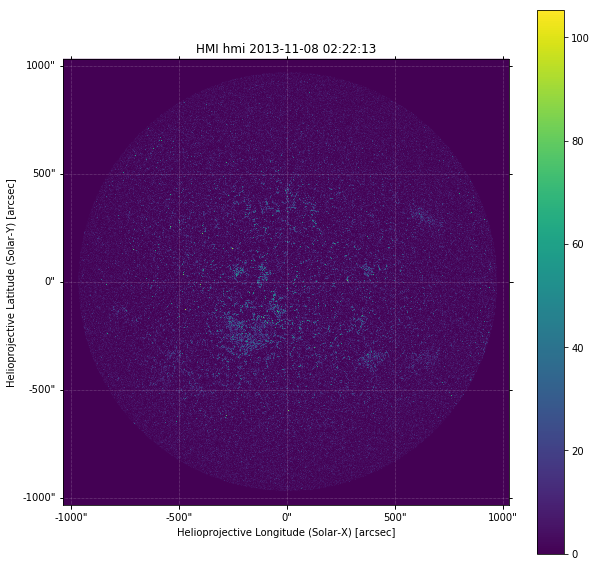

In [62]:
fig = plt.figure(figsize=(10,10))
Mdiffrot.plot(cmap='viridis')
plt.colorbar()

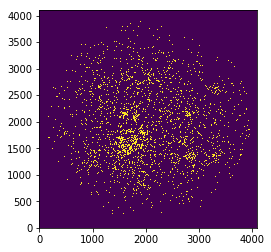

In [86]:
# Make initial mask to explore
mask = Mdiffrot.data > 10
plt.imshow(mask,origin='low')

In [105]:
Gdiff = ndimage.gaussian_filter(Mdiffrot.data,40)

a floating-point value was expected. [astropy.wcs.wcs]
a floating-point value was expected. [astropy.wcs.wcs]


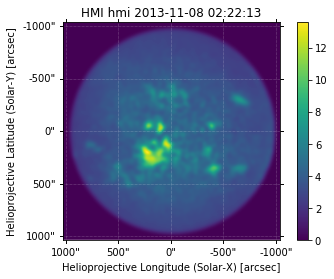

In [106]:
MGdiff = Map(Gdiff,map1.meta)
MGdiff.plot(cmap='viridis')
plt.colorbar()

In [107]:
Gmask = Gdiff > Gdiff.max()*0.5

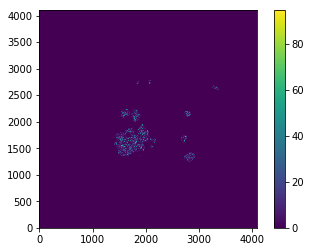

In [108]:
plt.imshow(Mdiffrot.data*Gmask,origin='low')
plt.colorbar()

In [109]:
labels, n = ndimage.label(Gdiff*Gmask)

11

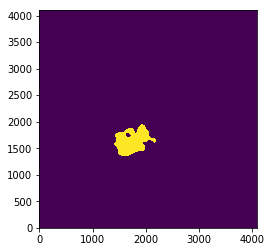

In [117]:
plt.imshow(labels==2,origin='l')
#plt.colorbar()

In [118]:
flaremask = (labels==2)

a floating-point value was expected. [astropy.wcs.wcs]
a floating-point value was expected. [astropy.wcs.wcs]


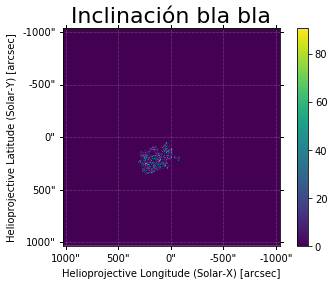

In [121]:
MapFlareMask = Map(Mdiffrot.data*flaremask,map1.meta)
MapFlareMask.plot(cmap='viridis')
plt.title('Inclinación bla bla', fontsize=22)
plt.colorbar()

In [126]:
# Cargar todos los otros datos
Mdiffrot_ti = Mdiffrot

In [139]:
Int_Inc = []
tiempos = []
#for Mdiffrot_ti in Todos_Maps:
Int_Inc.append((Mdiffrot_ti.data*flaremask).sum())
tiempos.append(datetime.datetime.strptime(Mdiffrot_ti.meta["date-obs"],'%Y-%m-%dT%H:%M:%S.%f'))

In [140]:
Int_Inc

[2612070.860700525]

In [138]:
tiempos

[datetime.datetime(2013, 11, 8, 2, 22, 13)]

In [ ]:
# Buscar como usar tplot Y graficas Int_Inc vs tiempos